#  Fitzugh Nagumo Model

Implementation of Fitzugh Nagumo Model during the Exercise session.

Basically, it is a 2-dimensional expression for the neuronal dynamics.
The dynamics are expressed with two terms, u and w, and can be plotted on phase plane.

$$
\dot{u} = u -\frac{u^3}{3} - w + I
$$

$$
\dot{w} = \epsilon (b_0 + b_1 u - w)
$$

Here, U can be interpreted as voltage-like variable and W as recovery variable.

From the above equation, nullclines can be calculated as:
$$
u-nullcline : w = u -\frac{u^3}{3} - w + I
$$
$$
w-nullcline : w = b_0 + b_1*w
$$

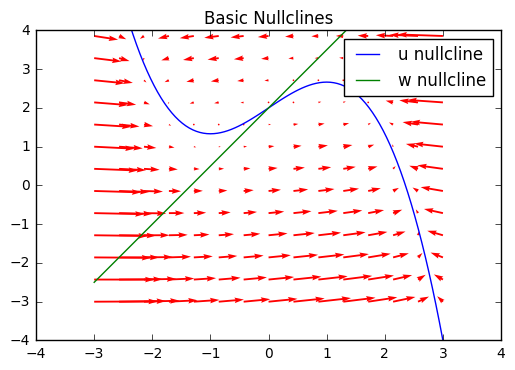

In [62]:
import numpy as np
import matplotlib.pyplot as plt

b0 = 2
b1 = 1.5
e = 0.1
dt = 0.1
I = 2

u_space = np.linspace(-3, 3, 100)
w_space = np.linspace(-3, 3, 100)
u_s = np.linspace(-3, 3, 15)
w_s = np.linspace(-3, 5, 15)

u1, w1 = np.meshgrid(u_s, w_s)

u_differ = lambda u, w, I : u - (1/3.0)*(u**3) - w + I
w_differ = lambda u, w, I :  e*(b0 + b1*u - w)
u_nullcline = lambda u, I : u - (1/3.0)*(u**3) + I
w_nullcline = lambda u : b0 + b1*u

u_update = lambda u, w, I : u_differ(u,w,I)*dt + u
w_update = lambda u, w, I : w_differ(u,w,I)*dt + w

u_null = u_nullcline(u_space, I)
w_null = w_nullcline(u_space)

plt.figure()
plt.title("Basic Nullclines")
plt.plot(u_space, u_null, label="u nullcline")
plt.plot(u_space, w_null, label="w nullcline")
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.quiver(u1, w1, u_differ(u1, w1, I), w_differ(u1, w1, I), color='r')
plt.legend()
plt.show()



As we have figure out the shape of the nullclines, it's time to implement the dynamics of u, w.

Below function constructs the phase of the variables and plot the phase change on **2D plane**.

In [71]:
def phase_plane(u_point, w_point, I, datasize = 1000) :
    u_space1 = np.linspace(-3, 3, 100)
    w_space1 = np.linspace(-3, 3, 100)
    
    plt.figure()
    plt.title("Starting at U = " + str(u_point) + ", W = " + str(w_point) + ", I = " + str(I))
    u_null1 = u_nullcline(u_space1, I)
    w_null1 = w_nullcline(w_space1)
    plt.plot(u_space, u_null1, label="u nullcline")
    plt.plot(w_space, w_null1, label="w nullcline")
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.quiver(u1, w1, u_differ(u1, w1, I), w_differ(u1, w1, I), color='gray')
    plt.legend()

    u_points = []
    w_points = []

    for i in range(1, datasize):
        a = u_update(u_point, w_point, I)
        b = w_update(u_point, w_point, I)
        u_point = a
        w_point = b
        u_points.append(u_point)
        w_points.append(w_point)


    plt.plot(u_points, w_points, color='r')
    plt.show()

    plt.figure()
    plt.plot(u_points, label='u plot')
    plt.plot(w_points, label='w plot')
    plt.legend()
    plt.show()



Now, we'll draw the **phase plane** and plot **u and w**. 

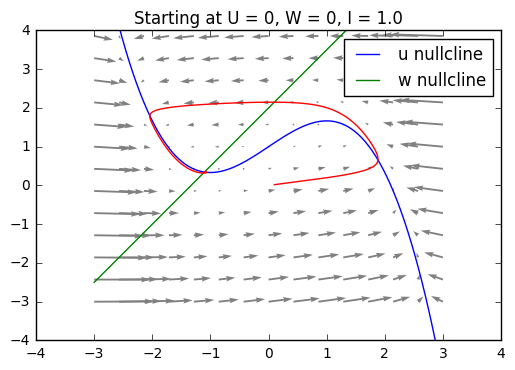

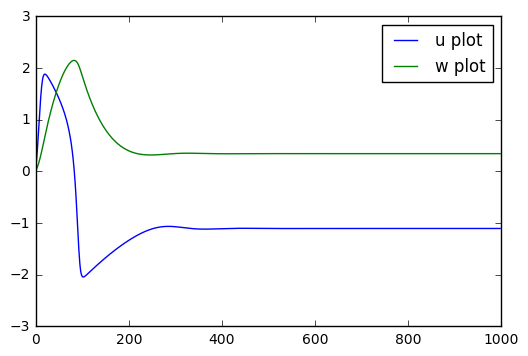

In [72]:
phase_plane(0, 0, 1.0, 1000)

As we can see in the above figure, the neuron falls into fixed point and stop firing.

However, if we test the neuronal dynamics with stronger current input, we can see **repetitive firing**.

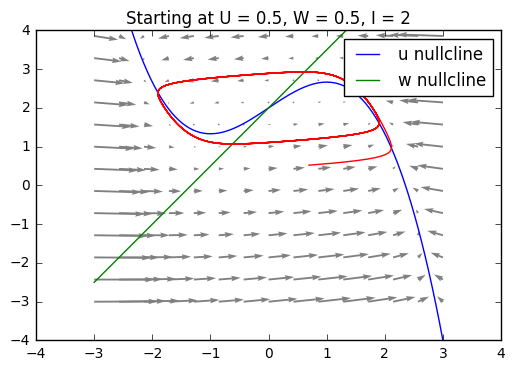

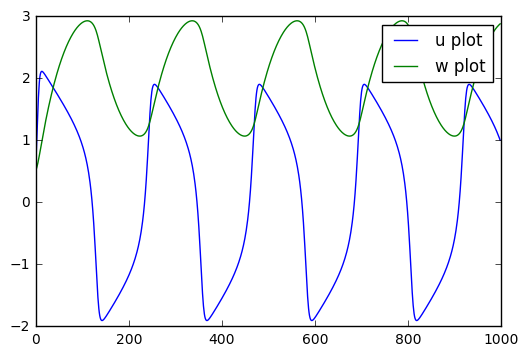

In [73]:
phase_plane(0.5, 0.5, 2, 1000)

If we inject weaker current and change the starting point, we might see **no spikes** at all.

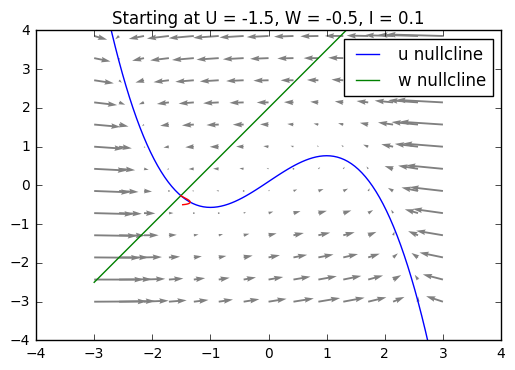

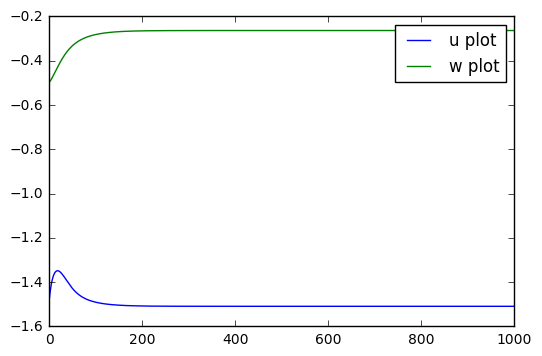

In [74]:
phase_plane(-1.5, -0.5, 0.1, 1000)

Also, we can see the **excitation block** of the neuron. 

When the input current is slowly increasing, the neuron does not show any firing. 
(Even when the current level exceeds the threshold.)

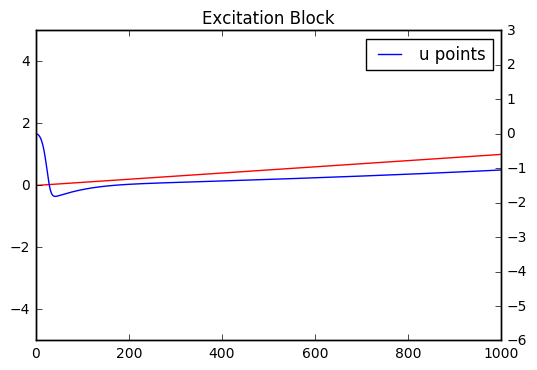

In [104]:
datasize = 1000
Input = np.linspace(0.0, 1.0, 1000)

u_points = np.zeros(datasize)
w_points = np.zeros(datasize)

u_point = 0
w_point = 0

for i in range(datasize):   
        a = u_update(u_point, w_point, Input[i])
        b = w_update(u_point, w_point, Input[i])
        u_point = a
        w_point = b
        u_points[i] = u_point
        w_points[i] = w_point


fig, ax1 = plt.subplots()
plt.title("Excitation Block")

ax1.plot(Input, label = "input currents", color = 'r')
ax1.set_ylim([-5, 5])
ax2 = ax1.twinx()
ax2.plot(u_points, label="u points", color = 'b')
ax2.set_ylim([-6, 3])
plt.legend()
plt.show()


